<h1><center>Bright Purple and White Modern Social Media Marketing Monthly Report Presentation </center></h1>

## Data Exploration and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [2]:
# Load dataset
df = pd.read_csv("dataset.csv")

In [3]:
# Display dataset info
print("Dataset Info:\n", df.info())
print("\nNumber of Rows and Columns:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Cuisines    9
dtype: int64


In [5]:
# Drop rows with missing values
df = df.dropna()

# Confirm that all missing values are removed
print("\nMissing Values After Truncation:\n", df.isnull().sum().sum())  # Should print 0


Missing Values After Truncation:
 0


In [6]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
# Convert data types
df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors='coerce')

In [8]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    64.274997    25.848532   
std     8.791967e+06     56.451600    41.197602    11.010094   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.081565    28.478658   
50%     6.002726e+06      1.000000    77.192031    28.570444   
75%     1.835260e+07      1.000000    77.282043    28.642711   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.00000

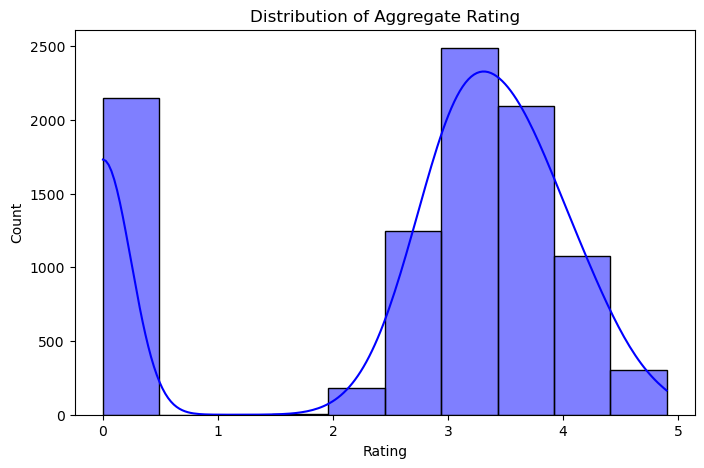

In [9]:
# Target Variable Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Aggregate rating"], bins=10, kde=True, color="blue")
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### Analysis of Aggregate Rating Distribution
The histogram shows the distribution of restaurant ratings, with the Kernel Density Estimation (KDE) line overlaid in blue.
### Key Observations
Bimodal Distribution:

The plot has two peaks:

One at 0 (indicating many restaurants have zero ratings).

Another between 2.5 and 4, showing most rated restaurants fall in this range.

Significant Number of Zero Ratings:

A large bar at 0 suggests many restaurants have not received ratings.

This could be due to new restaurants, inactive listings, or missing data.

Majority of Ratings Cluster Around 3-4:

Most rated restaurants have a rating between 2.5 and 4, suggesting an average to above-average rating.

Few restaurants have ratings above 4, implying that highly-rated restaurants are rare.

Possible Class Imbalance:

Since many entries have a rating of 0, this might lead to skewed model training if ratings are used as a classification target.

Handling strategies:

Consider removing zero ratings if they represent missing data.

Use upsampling or downsampling if predicting high-rated restaurants.

In [10]:
# Checking for class imbalance
print("\nClass Distribution:\n", df["Aggregate rating"].value_counts())


Class Distribution:
 Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


### Analysis of Class Distribution for Aggregate Ratings
#### Key Observations
Class Imbalance Exists

The most frequent rating is 0.0 with 2,148 occurrences, which is significantly higher than any other rating.

This suggests that many restaurants have not received ratings or their ratings are missing.

Most Ratings Cluster Around 3.0 - 4.0

Ratings like 3.2 (522), 3.1 (519), 3.4 (495), 3.3 (483), and 3.5 (480) are among the most common.

The bulk of ratings are in the mid-range (2.5 - 4.5).

Higher Ratings Are Less Frequent

Ratings above 4.5 are rare (e.g., 4.8 has 25, 4.9 has 61).

This implies that very high ratings are uncommon, possibly indicating stricter user reviews or fewer exceptional restaurants.

Very Low Ratings Are Also Rare

Ratings below 2.5 have extremely low occurrences (e.g., 1.8 has just 1 count, 2.0 has 7 counts).

This suggests that restaurants rarely receive extremely bad ratings.


# Descriptive Analysis

In [11]:
# Basic statistical measures for numerical columns
numerical_summary = df.describe()
print(numerical_summary)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    64.274997    25.848532   
std     8.791967e+06     56.451600    41.197602    11.010094   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.081565    28.478658   
50%     6.002726e+06      1.000000    77.192031    28.570444   
75%     1.835260e+07      1.000000    77.282043    28.642711   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [12]:
# Distribution of categorical variables
print("\nCountry Code Distribution:\n", df["Country Code"].value_counts())
print("\nCity Distribution:\n", df["City"].value_counts())
print("\nCuisines Distribution:\n", df["Cuisines"].value_counts())



Country Code Distribution:
 Country Code
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

City Distribution:
 City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: count, Length: 140, dtype: int64

Cuisines Distribution:
 Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                

In [13]:
# Top cuisines and cities with the highest number of restaurants
top_cuisines = df["Cuisines"].value_counts().head(10)
top_cities = df["City"].value_counts().head(10)

print("\nTop 10 Cuisines:\n", top_cuisines)
print("\nTop 10 Cities:\n", top_cities)


Top 10 Cuisines:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Top 10 Cities:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64


### Visualizing the Distribution

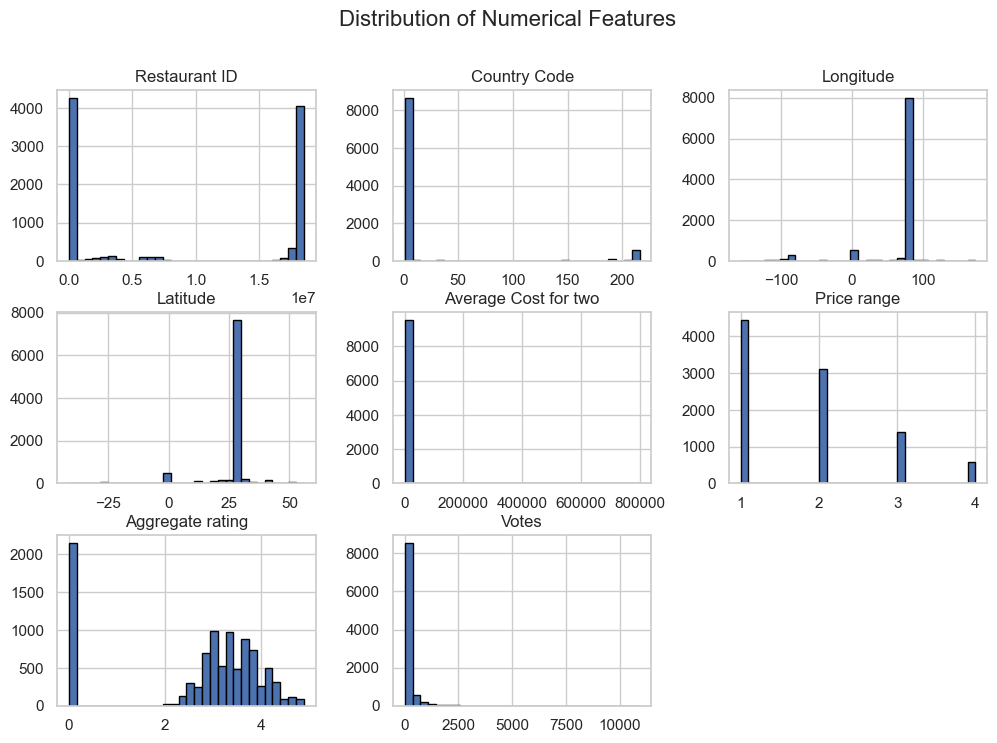

In [14]:
# Set plot style
sns.set(style="whitegrid")

# Plot Histograms for numerical columns
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

### Key Observations:

Highly Skewed Features:

"Votes" and "Average Cost for Two" seem to have a high number of restaurants with low values.

"Aggregate Rating" shows a peak at low ratings but is more evenly distributed beyond that.

Outliers Present:

The "Votes" and "Average Cost for Two" features have a few very high values that may need handling.

Categorical Features:

"Country Code" and "City" have a few dominant values, indicating some countries/cities have most of the restaurants.

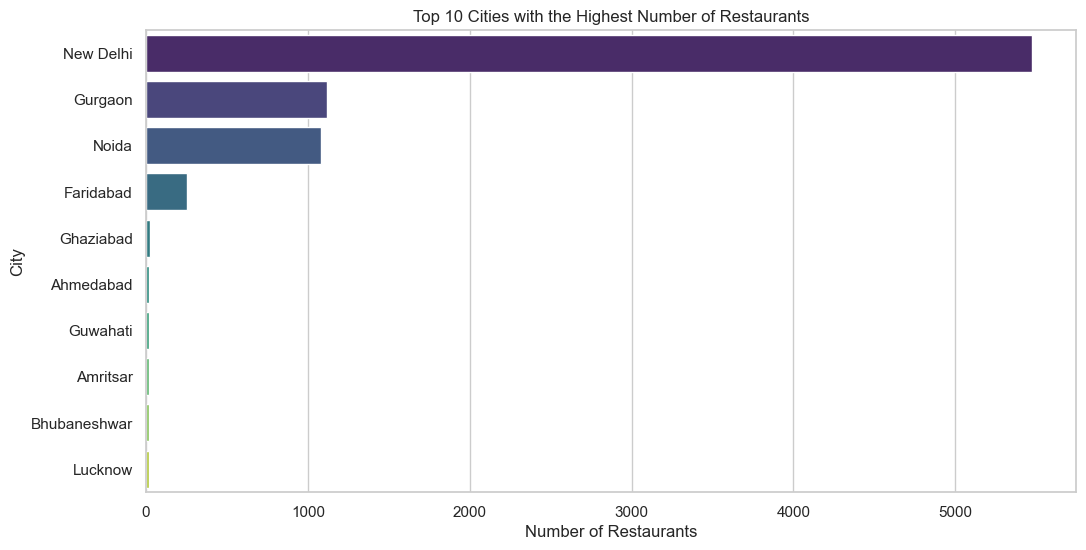

In [15]:
# Bar plot for Top 10 Cities with most restaurants
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Top 10 Cities with the Highest Number of Restaurants")
plt.show()

### Observations:
New Delhi Dominates 🚀: It has the highest number of restaurants, far surpassing other cities.

Gurgaon & Noida Follow: Both cities have a significant number of restaurants, but still much fewer than New Delhi.

Smaller Representation: Cities like Ahmedabad, Guwahati, Amritsar, Bhubaneshwar, and Lucknow have a much lower number of restaurants.

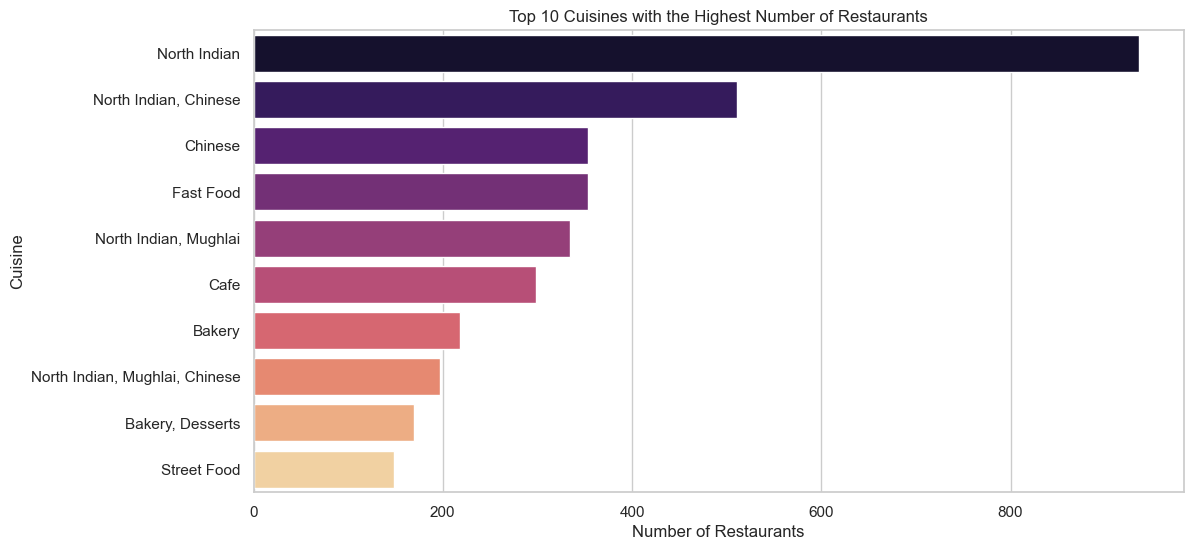

In [16]:
# Bar plot for Top 10 Cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="magma")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.title("Top 10 Cuisines with the Highest Number of Restaurants")
plt.show()

### Observations:
North Indian Cuisine Dominates 🇮🇳

"North Indian" is the most popular cuisine, far ahead of the others.

Variants like North Indian, Chinese and North Indian, Mughlai also rank high.

Chinese and Fast Food Are Popular 🍜🍔

"Chinese" and "Fast Food" cuisines have a significant number of restaurants.

The combination North Indian, Chinese is the second most popular.

Diverse Preferences 🍰🍛

"Cafe," "Bakery," and "Street Food" also have a strong presence.

Some cuisines combine multiple food types, e.g., "North Indian, Mughlai, Chinese".

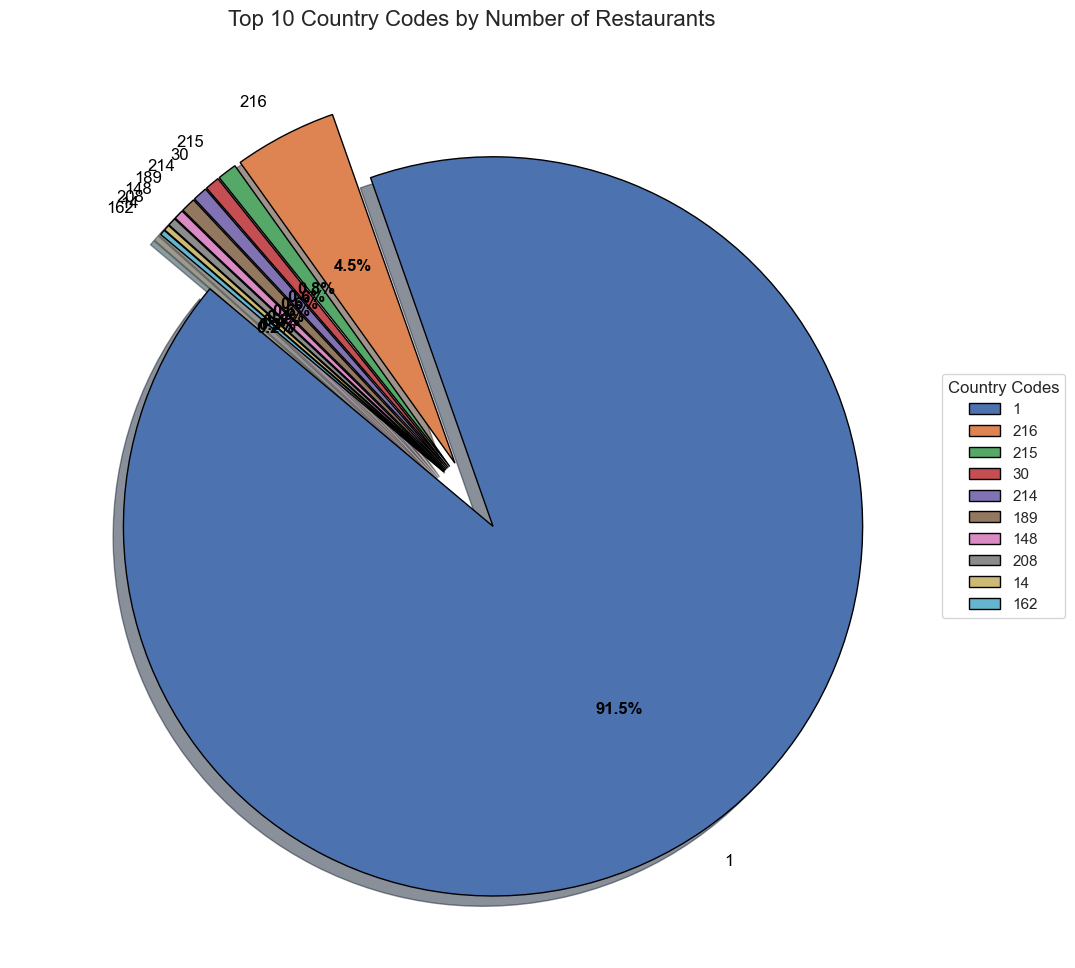

In [17]:
# Get top 10 country codes and their counts
country_counts = df["Country Code"].value_counts().head(10)
labels = country_counts.index.astype(str)  # Convert country codes to string for labels
sizes = country_counts.values  

# Define explode values: Explode smaller segments more for better visibility
explode = [0.1 if size > 5 else 0.4 for size in sizes]  

# Create a larger figure
fig, ax = plt.subplots(figsize=(12, 12))  

# Plot the pie chart
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    explode=explode, shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

# Adjust text properties for better visibility
for text in texts + autotexts:
    text.set_fontsize(12)  
    text.set_color('black')  

# Improve label positioning
plt.setp(autotexts, size=12, weight="bold")

# Add legend for clarity
ax.legend(wedges, labels, title="Country Codes", loc="center left", bbox_to_anchor=(1, 0.5))

# Add title
plt.title("Top 10 Country Codes by Number of Restaurants", fontsize=16)

# Show plot
plt.show()


### Observations:
One Country Dominates (91.5%) 🏆

The country with code 1 has the vast majority of restaurants in the dataset.
Small Contributions from Other Countries

The remaining 9 country codes collectively make up only 8.5% of the total.
The second-largest slice (code 216) accounts for 4.5%, while the rest have very minimal shares.
Label Overlap Issue 📝

The labels for the smaller segments are overlapping, making it hard to read them. It might help to display them separately or use a bar chart for better clarity.

## Geospatial Analysis

In [18]:
# Check for missing latitude & longitude values
print(df[['Latitude', 'Longitude', 'City', 'Country Code', 'Aggregate rating']].isnull().sum())


Latitude            0
Longitude           0
City                0
Country Code        0
Aggregate rating    0
dtype: int64


## Create a base map centered around an average latitude and longitude

In [19]:
# Create a base map centered around an average latitude and longitude
#m = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=4)

# Add restaurant locations
#for _, row in df.iterrows():
    #folium.Marker(
        #location=[row["Latitude"], row["Longitude"]],
        #popup=f"Rating: {row['Aggregate rating']}"
    #).add_to(m)

# Save the map as an HTML file
#m.save("restaurants_map2.html")
#m

### Observations from the Geospatial Analysis
#### High Restaurant Density in India 🇮🇳

The majority of restaurants are concentrated in India, particularly in cities like Mumbai, Delhi, Bangalore, and Hyderabad.

This aligns with the earlier pie chart, where one country (likely India) dominated the dataset.

Smaller Clusters in the Middle East & Southeast Asia

#### There are visible clusters in countries like UAE (Dubai, Abu Dhabi), Turkey (Istanbul, Antalya), and Singapore.
These regions likely have a growing restaurant scene but contribute far less compared to India.

Sparse Distribution in Africa & Europe

#### Very few restaurants appear in North Africa (Algeria) and West Africa (Ghana).
Almost no restaurants are present in Europe, indicating either data limitations or low restaurant representation.

Potential Correlation with Urbanization & Economy 💡

#### The highest densities are in economically active and urbanized regions.
Countries with higher populations and tourism hubs tend to have more restaurants.

In [20]:
# Create a heatmap to see restaurant concentration in different areas:
#m = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=4)
#HeatMap(df[['Latitude', 'Longitude']].values, radius=8, blur=5).add_to(m)
#m.save("restaurant_heatmap.html")
#m

Areas with high restaurant density appear as red regions.

## Distribution of Restaurants by City

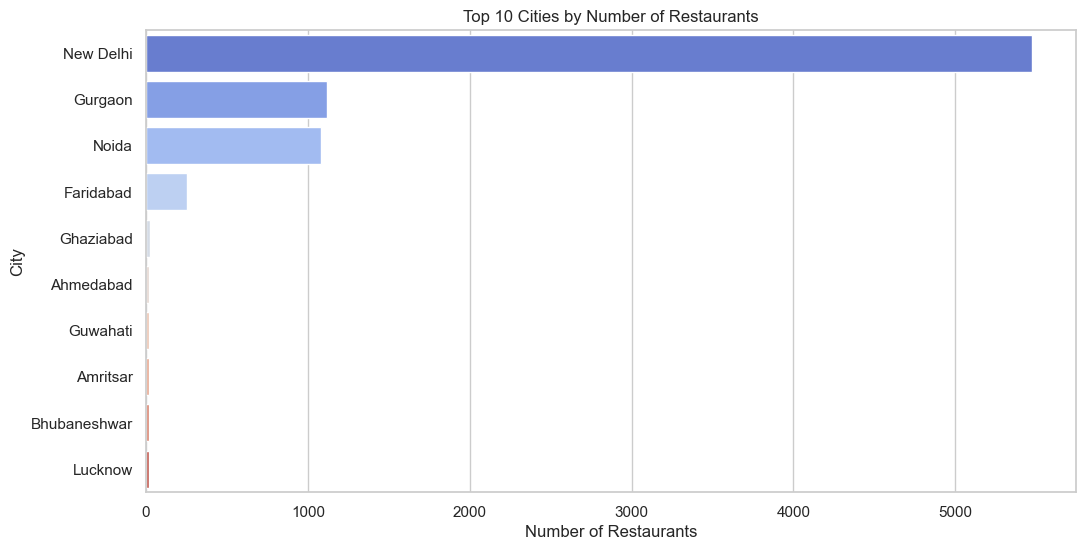

In [21]:
#Distribution of Restaurants by City

plt.figure(figsize=(12, 6))
top_cities = df["City"].value_counts().head(10)  # Top 10 cities with the most restaurants
sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Top 10 Cities by Number of Restaurants")
plt.show()

Shows which cities have the highest number of restaurants.

## Correlation Between Location & Ratings, to determine if location impacts rating:

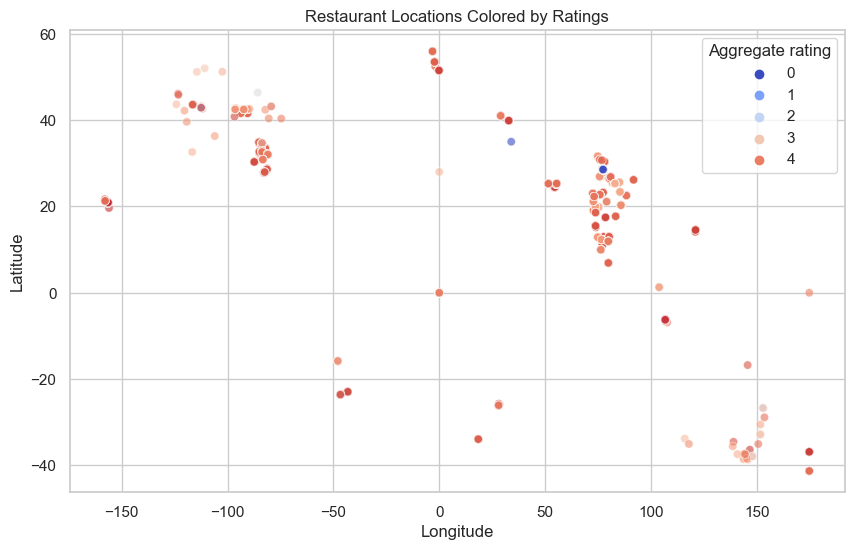

In [22]:
# Correlation Between Location & Ratings, to determine if location impacts rating

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="Aggregate rating", palette="coolwarm", alpha=0.6)
plt.title("Restaurant Locations Colored by Ratings")
plt.show()

### Observations from the Restaurant Ratings Map
#### Highly Rated Restaurants Dominate

The majority of points are in shades of red and light red, indicating ratings of 3 and 4 (higher ratings).

This suggests that most restaurants in the dataset have decent to good ratings.

#### Low-Rated Restaurants Exist but Are Sparse

A few blue points (ratings 0, 1, and 2) are scattered across the map.

These appear in different regions, meaning no single location dominates in terms of bad reviews.

#### Clustered High-Rating Areas

India & Southeast Asia: A dense cluster of well-rated restaurants.

North America: Smaller clusters of high ratings exist.

Australia: A visible concentration of good-rated restaurants.

#### Potential Areas for Improvement

The few blue markers could be explored further to identify patterns in low-rated restaurants:

Are they in specific countries?

Do they share common issues like poor service, pricing, or food quality?

## Calculate Percentage of Restaurants Offering Table Booking & Online Delivery

Table Booking Percentage:
 Has Table booking
No     87.864179
Yes    12.135821
Name: proportion, dtype: float64

Online Delivery Percentage:
 Has Online delivery
No     74.313561
Yes    25.686439
Name: proportion, dtype: float64


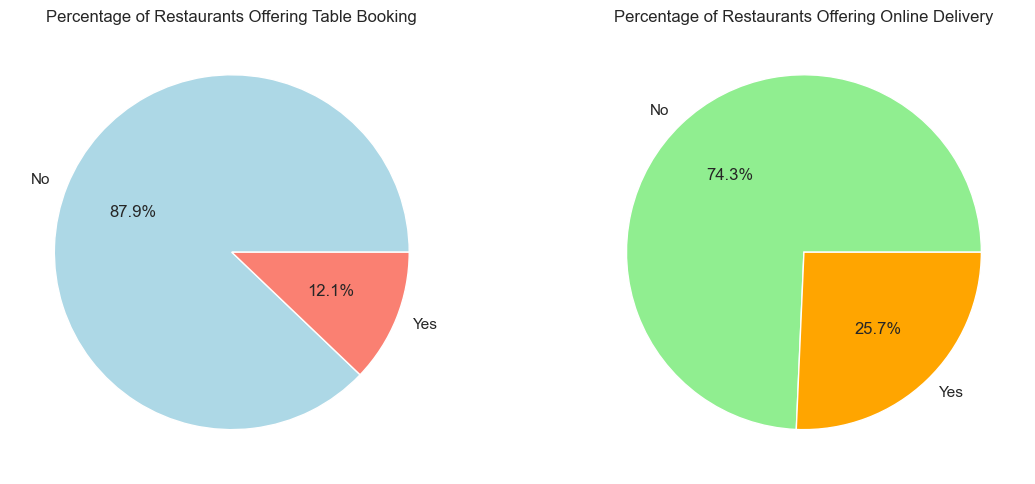

In [23]:
# Compute percentages
table_booking_percent = df['Has Table booking'].value_counts(normalize=True) * 100
online_delivery_percent = df['Has Online delivery'].value_counts(normalize=True) * 100

print("Table Booking Percentage:\n", table_booking_percent)
print("\nOnline Delivery Percentage:\n", online_delivery_percent)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Pie Chart for Table Booking
ax[0].pie(table_booking_percent, labels=table_booking_percent.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
ax[0].set_title("Percentage of Restaurants Offering Table Booking")

# Pie Chart for Online Delivery
ax[1].pie(online_delivery_percent, labels=online_delivery_percent.index, autopct='%1.1f%%', colors=['lightgreen', 'orange'])
ax[1].set_title("Percentage of Restaurants Offering Online Delivery")

plt.tight_layout()
plt.show()

## Compare Average Ratings for Restaurants with & without Table Booking

Average Ratings by Table Booking Availability:
 Has Table booking
No     2.557956
Yes    3.441969
Name: Aggregate rating, dtype: float64


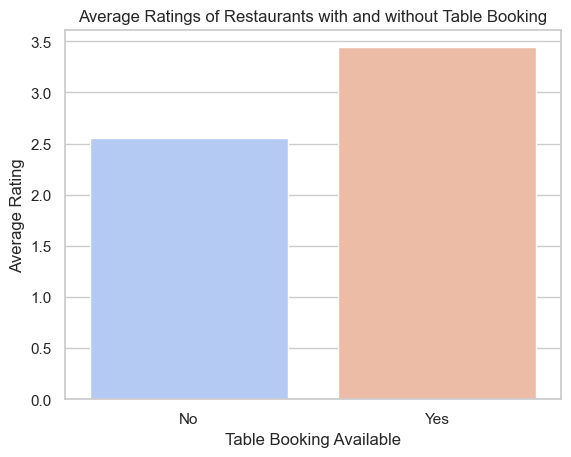

In [24]:
# Group by 'Has Table booking' status and calculate average rating
table_booking_ratings = df.groupby('Has Table booking')['Aggregate rating'].mean()

print("Average Ratings by Table Booking Availability:\n", table_booking_ratings)

# Plot
sns.barplot(x=table_booking_ratings.index, y=table_booking_ratings.values, palette='coolwarm')
plt.xlabel("Table Booking Available")
plt.ylabel("Average Rating")
plt.title("Average Ratings of Restaurants with and without Table Booking")
plt.show()

## Analyze Online Delivery Availability by Price Range

Online Delivery Availability by Price Range:
 Has Online delivery         No        Yes
Price range                              
1                    84.204597  15.795403
2                    58.689367  41.310633
3                    70.747331  29.252669
4                    90.955631   9.044369


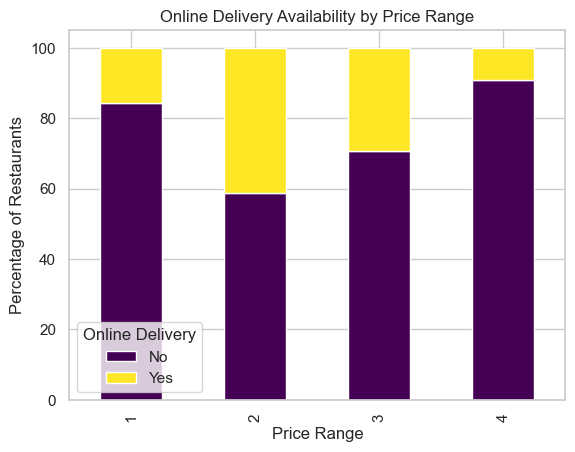

In [25]:
# Group by 'Price range' and calculate online delivery percentage
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100

print("Online Delivery Availability by Price Range:\n", online_delivery_by_price)

# Plot
online_delivery_by_price.plot(kind='bar', stacked=True, colormap="viridis")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.title("Online Delivery Availability by Price Range")
plt.legend(title="Online Delivery", labels=["No", "Yes"])
plt.show()

#### Key Takeaways from the Visualization:

Price Range 1 & 2 have a higher proportion of online delivery availability than Price Range 3 & 4.

Price Range 4 (high-end restaurants) has the least online delivery availability.

Mid-range (Price Range 2 & 3) has a mixed proportion, but Price Range 3 has more "No Online Delivery" restaurants.

##### Lower-priced restaurants (Price Range 1 & 2) are more likely to offer online delivery.

This means that cheaper restaurants tend to provide online delivery services more often than expensive ones.
##### Higher-priced restaurants (Price Range 3 & 4) are less likely to offer online delivery.

Fancy or expensive restaurants are less likely to have an online delivery option.
##### The most expensive restaurants (Price Range 4) rarely offer online delivery.

If you're looking for online delivery, you're less likely to find it at high-end restaurants.

## Price Range Analysis

Most Common Price Range: 1
Highest Average Rating is for Price Range: 4
Color representing the highest rating: Yellow


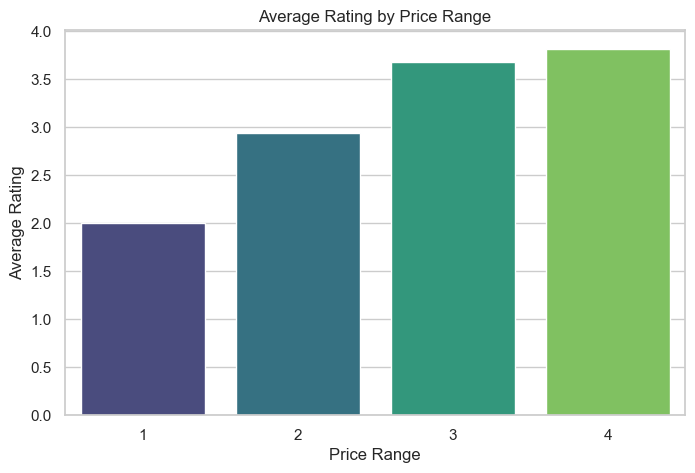

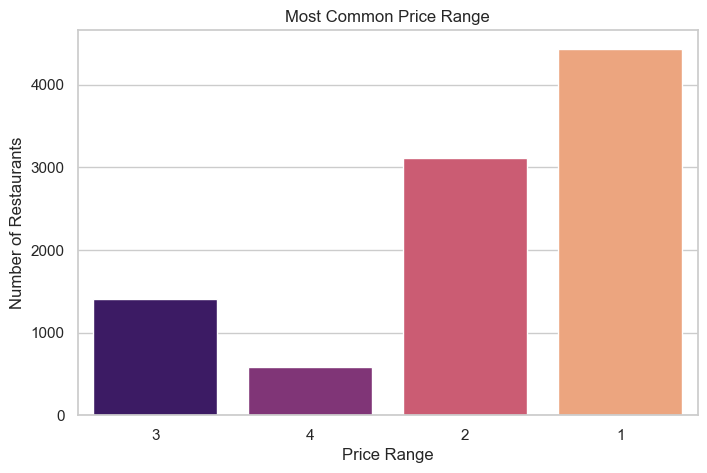

In [26]:
# Convert price range to categorical type for better visualization
df["Price range"] = df["Price range"].astype(str)

# 1. Determine the most common price range
most_common_price_range = df["Price range"].value_counts().idxmax()
print(f"Most Common Price Range: {most_common_price_range}")

# 2. Calculate the average rating for each price range
price_range_avg_rating = df.groupby("Price range")["Aggregate rating"].mean()

# 3. Identify the color representing the highest average rating
highest_avg_rating_price = price_range_avg_rating.idxmax()
highest_avg_rating_color = df[df["Price range"] == highest_avg_rating_price]["Rating color"].mode()[0]

print(f"Highest Average Rating is for Price Range: {highest_avg_rating_price}")
print(f"Color representing the highest rating: {highest_avg_rating_color}")

# Visualization - Average Rating by Price Range
plt.figure(figsize=(8, 5))
sns.barplot(x=price_range_avg_rating.index, y=price_range_avg_rating.values, palette="viridis")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.title("Average Rating by Price Range")
plt.show()

# Visualization - Most Common Price Range
plt.figure(figsize=(8, 5))
sns.countplot(x="Price range", data=df, palette="magma")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Most Common Price Range")
plt.show()

# Feature Engineering

In [27]:
# 1. Extract Features
df["Restaurant Name Length"] = df["Restaurant Name"].apply(len)
df["Address Length"] = df["Address"].apply(len)
df["Cuisine Count"] = df["Cuisines"].fillna("").apply(lambda x: len(x.split(",")))

# 2. Encode Categorical Variables
df["Has Table Booking"] = df["Has Table booking"].map({"Yes": 1, "No": 0})
df["Has Online Delivery"] = df["Has Online delivery"].map({"Yes": 1, "No": 0})
df["Is Delivering Now"] = df["Is delivering now"].map({"Yes": 1, "No": 0})

# 3. Additional Features
df["Popularity Score"] = df["Aggregate rating"] * df["Votes"]
df["High-End Restaurant"] = (df["Price range"] == 4).astype(int)

# Display the updated DataFrame with new features
print(df.head())

# Save the updated dataset
df.to_csv("restaurant_dataset_with_features.csv", index=False)

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [28]:
#import pandas as pd

# Ensure column names are strings and strip whitespace
#df.columns = df.columns.astype(str).str.strip()

# Dictionary to track occurrences
#counts = {}
#new_columns = []

# Iterate through columns and rename duplicates
#for col in df.columns:
    #col_lower = col.lower()  # Convert to lowercase for uniformity
    #if col_lower in counts:
        #counts[col_lower] += 1
        #new_columns.append(f"{col}_{counts[col_lower]}")  # Append index for duplicates
    #else:
        #counts[col_lower] = 0
        #new_columns.append(col)  # Keep original name

#df.columns = new_columns  # Assign new column names

# Print updated column names
#print(df.columns)
#df["Has Table booking"] = df["Has Table booking"].astype(str).map({"Yes": 1, "No": 0})
#df["Has Online delivery"] = df["Has Online delivery"].astype(str).map({"Yes": 1, "No": 0})
#df["Is delivering now"] = df["Is delivering now"].astype(str).map({"Yes": 1, "No": 0})
#df["Has Table Booking_1"] = df["Has Table Booking_1"].astype(str).map({"Yes": 1, "No": 0})
#df["Has Online Delivery_1"] = df["Has Online Delivery_1"].astype(str).map({"Yes": 1, "No": 0})
#df["Is Delivering Now_1"] = df["Is Delivering Now_1"].astype(str).map({"Yes": 1, "No": 0})

#for col in ["Has Table booking", "Has Online delivery", "Is Delivering now"]:
    #dupe_col = [c for c in df.columns if c.startswith(col) and c != col]  # Find duplicate column
    #if dupe_col:
        #print(f"Comparing '{col}' and '{dupe_col[0]}'...")
        #if df[col].equals(df[dupe_col[0]]):
            #print(f"✅ Columns '{col}' and '{dupe_col[0]}' are identical.")
        #else:
            #print(f"❌ Columns '{col}' and '{dupe_col[0]}' have different values.")

#df = df.drop(columns=["Has Table Booking_1", "Has Online Delivery_1"])

#if df["Is Delivering now"].equals(df["Is Delivering Now_1"]):
    #print("✅ The columns are identical. 'Is Delivering Now_1' is just a duplicate.")
#else:
    #print("❌ The columns have different values.")
    
#print(df[["Is Delivering now", "Is Delivering Now_1"]].dropna().head(10))

#print(df.loc[df["Is Delivering Now"] != df["Is Delivering Now_26"], ["Is Delivering Now", "Is Delivering Now_26"]])

#df = df.drop(columns=["Is Delivering Now_26"])

#print("✅ Removed unnecessary column.")

#print(df.columns)

In [29]:
df = df.loc[:, ~df.columns.duplicated()]

In [30]:
# Extract Length-Based Features
df["Locality Length"] = df["Locality"].apply(len)
df["Locality Verbose Length"] = df["Locality Verbose"].apply(len)
df["Cuisine Count"] = df["Cuisines"].apply(lambda x: len(str(x).split(",")))

In [31]:
#Extract Geographical Features
df["Longitude Rounded"] = df["Longitude"].round(2)
df["Latitude Rounded"] = df["Latitude"].round(2)

In [32]:
#Extract Sentiment-Based Features
rating_mapping = {
    "Excellent": 5,
    "Very Good": 4,
    "Good": 3,
    "Average": 2,
    "Poor": 1
}
df["Rating Score"] = df["Rating text"].map(rating_mapping)

In [33]:
#Extract Binary Features
df["Is High-End"] = (df["Popularity Score"] > df["Popularity Score"].median()).astype(int)

In [34]:
#Count Unique Cuisine Types
df["Unique Cuisine Count"] = df["Cuisines"].apply(lambda x: len(set(str(x).split(","))))

In [35]:
#Flag Restaurants Serving Specific Popular Cuisines
popular_cuisines = ["Afghani", "African", "American", "Andhra", "Arabian", "Argentine", "Armenian", "Asian",
                    "Asian Fusion", "Assamese", "Australian", "Awadhi", "BBQ", "Bakery", "Bar Food", "Belgian",
                    "Bengali", "Beverages", "Bihari", "Biryani", "Brazilian", "Breakfast", "British", "Bubble Tea",
                    "Burger", "Burmese", "Börek", "Cafe", "Cajun", "Canadian", "Cantonese", "Caribbean", "Charcoal Grill",
                    "Chettinad", "Chinese", "Coffee and Tea", "Contemporary", "Continental", "Cuban", "Cuisine Varies",
                    "Curry", "Deli", "Desserts", "Dim Sum", "Diner", "Drinks Only", "Durban", "Döner", "European",
                    "Fast Food", "Filipino", "Finger Food", "Fish and Chips", "French", "Fusion", "German", "Goan",
                    "Gourmet Fast Food", "Greek", "Grill", "Gujarati", "Hawaiian", "Healthy Food", "Hyderabadi",
                    "Ice Cream", "Indian", "Indonesian", "International", "Iranian", "Irish", "Italian", "Izgara",
                    "Japanese", "Juices", "Kashmiri", "Kebab", "Kerala", "Kiwi", "Korean", "Latin American", "Lebanese",
                    "Lucknowi", "Maharashtrian", "Malay", "Malaysian", "Malwani", "Mangalorean", "Mediterranean",
                    "Mexican", "Middle Eastern", "Mineira", "Mithai", "Modern Australian", "Modern Indian", "Moroccan",
                    "Mughlai", "Naga", "Nepalese", "New American", "North Eastern", "North Indian", "Oriya",
                    "Pakistani", "Parsi", "Patisserie", "Peranakan", "Persian", "Peruvian", "Pizza", "Portuguese",
                    "Pub Food", "Rajasthani", "Ramen", "Raw Meats", "Restaurant Cafe", "Salad", "Sandwich", "Scottish",
                    "Seafood", "Singaporean", "Soul Food", "South African", "South American", "South Indian",
                    "Southern", "Southwestern", "Spanish", "Sri Lankan", "Steak", "Street Food", "Sunda", "Sushi",
                    "Taiwanese", "Tapas", "Tea", "Teriyaki", "Tex-Mex", "Thai", "Tibetan", "Turkish", "Turkish Pizza",
                    "Vegetarian", "Vietnamese", "Western", "World Cuisine"]
for cuisine in popular_cuisines:
    df[f"Serves {cuisine}"] = df["Cuisines"].apply(lambda x: 1 if cuisine in str(x) else 0)

C:\Users\Geoffrey\AppData\Local\Temp\ipykernel_5540\2983669224.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Serves {cuisine}"] = df["Cuisines"].apply(lambda x: 1 if cuisine in str(x) else 0)
C:\Users\Geoffrey\AppData\Local\Temp\ipykernel_5540\2983669224.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Serves {cuisine}"] = df["Cuisines"].apply(lambda x: 1 if cuisine in str(x) else 0)
C:\Users\Geoffrey\AppData\Local\Temp\ipykernel_5540\2983669224.py:22: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\Geoffrey\AppData\Local\Temp\ipykernel_5540\2983669224.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Serves {cuisine}"] = df["Cuisines"].apply(lambda x: 1 if cuisine in str(x) else 0)
C:\Users\Geoffrey\AppData\Local\Temp\ipykernel_5540\2983669224.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Serves {cuisine}"] = df["Cuisines"].apply(lambda x: 1 if cuisine in str(x) else 0)
C:\Users\Geoffrey\AppData\Local\Temp\ipykernel_5540\2983669224.py:22: PerformanceWarning: DataFrame is highly fragmented.  Thi

In [36]:
# Convert the Cuisines column into a set of unique values
unique_cuisines = set()

# Iterate through each row, split by commas, and add to the set
df["Cuisines"].dropna().apply(lambda x: unique_cuisines.update(x.split(", ")))

# Convert to sorted list for better readability
unique_cuisines = sorted(unique_cuisines)

# Print or return the result
print(unique_cuisines)


['Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Argentine', 'Armenian', 'Asian', 'Asian Fusion', 'Assamese', 'Australian', 'Awadhi', 'BBQ', 'Bakery', 'Bar Food', 'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani', 'Brazilian', 'Breakfast', 'British', 'Bubble Tea', 'Burger', 'Burmese', 'B�_rek', 'Cafe', 'Cajun', 'Canadian', 'Cantonese', 'Caribbean', 'Charcoal Grill', 'Chettinad', 'Chinese', 'Coffee and Tea', 'Contemporary', 'Continental', 'Cuban', 'Cuisine Varies', 'Curry', 'Deli', 'Desserts', 'Dim Sum', 'Diner', 'Drinks Only', 'Durban', 'D�_ner', 'European', 'Fast Food', 'Filipino', 'Finger Food', 'Fish and Chips', 'French', 'Fusion', 'German', 'Goan', 'Gourmet Fast Food', 'Greek', 'Grill', 'Gujarati', 'Hawaiian', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indian', 'Indonesian', 'International', 'Iranian', 'Irish', 'Italian', 'Izgara', 'Japanese', 'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Kiwi', 'Korean', 'Latin American', 'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malay',

In [37]:
# Function to get top N most common cuisines
def get_top_cuisines(df, column="Cuisines", top_n=10):
    cuisine_counter = Counter()
    
    # Count occurrences of each cuisine
    df[column].dropna().apply(lambda x: cuisine_counter.update(x.split(", ")))
    
    # Get the top N cuisines
    return cuisine_counter.most_common(top_n)

# Get the top 10 most common cuisines
top_cuisines = get_top_cuisines(df)

print("Top 10 Most Common Cuisines:")
for cuisine, count in top_cuisines:
    print(f"{cuisine}: {count}")

Top 10 Most Common Cuisines:
North Indian: 3960
Chinese: 2735
Fast Food: 1986
Mughlai: 995
Italian: 764
Bakery: 745
Continental: 736
Cafe: 703
Desserts: 653
South Indian: 636


In [38]:
# Convert the Cuisines column into a set of unique values
City_count = set()

# Iterate through each row, split by commas, and add to the set
df["City"].dropna().apply(lambda x: City_count.update(x.split(", ")))

# Convert to sorted list for better readability
City = sorted(City_count)

# Print or return the result
print(City)

['Abu Dhabi', 'Agra', 'Ahmedabad', 'Albany', 'Allahabad', 'Amritsar', 'Ankara', 'Armidale', 'Athens', 'Auckland', 'Augusta', 'Aurangabad', 'Balingup', 'Bandung', 'Bangalore', 'Beechworth', 'Bhopal', 'Bhubaneshwar', 'Birmingham', 'Bogor', 'Boise', 'Bras�_lia', 'Cape Town', 'Cedar Rapids/Iowa City', 'Chandigarh', 'Chatham-Kent', 'Chennai', 'Clatskanie', 'Cochrane', 'Coimbatore', 'Colombo', 'Columbus', 'Consort', 'Dalton', 'Davenport', 'Dehradun', 'Des Moines', 'Dicky Beach', 'Doha', 'Dubai', 'Dubuque', 'East Ballina', 'Edinburgh', 'Faridabad', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville', 'Ghaziabad', 'Goa', 'Gurgaon', 'Guwahati', 'Hepburn Springs', 'Huskisson', 'Hyderabad', 'Indore', 'Inner City', 'Inverloch', 'Jaipur', 'Jakarta', 'Johannesburg', 'Kanpur', 'Kochi', 'Kolkata', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'London', 'Lorn', 'Lucknow', 'Ludhiana', 'Macedon', 'Macon', 'Makati City', 'Manchester', 'Mandaluyong City', 'Mangalore', 'Mayfield', 'Mc Millan', 'Middleton Beach', 'Moh

In [39]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# Predictive Modeling

In [40]:
# Drop irrelevant columns
columns_to_drop = ["Restaurant ID", "Address", "Locality", "Locality Verbose", "Cuisines", "Restaurant Name", "Currency", "Country Code", "Has Table booking", "City"]
df.drop(columns=columns_to_drop, inplace=True)


In [41]:
df.head()

,Longitude,Latitude,Average Cost for two,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,...,Serves Teriyaki,Serves Tex-Mex,Serves Thai,Serves Tibetan,Serves Turkish,Serves Turkish Pizza,Serves Vegetarian,Serves Vietnamese,Serves Western,Serves World Cuisine
0,121.027535,14.565443,1100,No,No,No,3,4.8,Dark Green,Excellent,...,0,0,0,0,0,0,0,0,0,0
1,121.014101,14.553708,1200,No,No,No,3,4.5,Dark Green,Excellent,...,0,0,0,0,0,0,0,0,0,0
2,121.056831,14.581404,4000,No,No,No,4,4.4,Green,Very Good,...,0,0,0,0,0,0,0,0,0,0
3,121.056475,14.585318,1500,No,No,No,4,4.9,Dark Green,Excellent,...,0,0,0,0,0,0,0,0,0,0
4,121.057508,14.584450,1500,No,No,No,4,4.8,Dark Green,Excellent,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Defining features and target variable
X = df.drop(columns=["Aggregate rating"])
y = df["Aggregate rating"]

In [44]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Has Online delivery', 'Is delivering now', 'Switch to order menu']

le = LabelEncoder()
for col in binary_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [46]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_cols = ['Rating color', 'Rating text']

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_train = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))
encoded_test = pd.DataFrame(encoder.transform(X_test[categorical_cols]))

# Drop original categorical columns and add encoded features
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True)

X_train = pd.concat([X_train, encoded_train], axis=1)
X_test = pd.concat([X_test, encoded_test], axis=1)


In [47]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [48]:
# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
imputer = SimpleImputer(strategy="mean")  # You can also use "median" or "most_frequent"
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Apply same transformation to test data

In [50]:

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                            MAE           MSE          RMSE      R2 Score
Linear Regression  1.716938e+08  3.286963e+19  5.733204e+09 -1.435335e+19
Decision Tree      7.349398e-02  1.773180e-02  1.331608e-01  9.922570e-01
Random Forest      6.865113e-02  1.138169e-02  1.066850e-01  9.950299e-01


# Customer Preference Analysis

In [51]:
data = pd.read_csv("dataset.csv")

# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values if necessary
data.dropna(inplace=True)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


### Analyze the Relationship Between Cuisine Type and Ratings

In [52]:
# Group by cuisine and calculate the average rating
cuisine_ratings = data.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)

print(cuisine_ratings)

Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64


C:\Users\Geoffrey\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


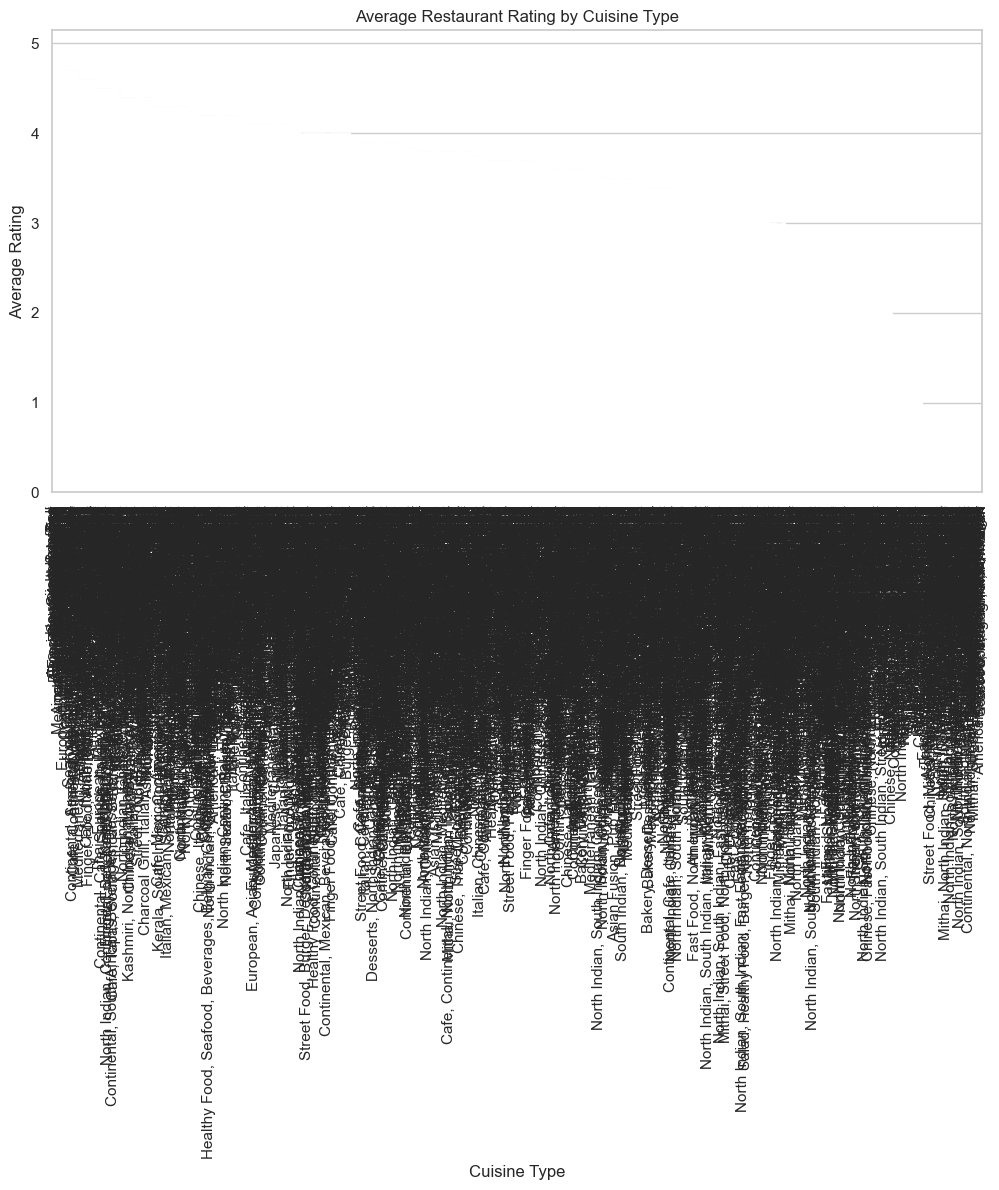

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_ratings.index, y=cuisine_ratings.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Cuisine Type")
plt.ylabel("Average Rating")
plt.title("Average Restaurant Rating by Cuisine Type")
plt.show()

### Identify the Most Popular Cuisines (Based on Votes)

In [54]:
cuisine_popularity = data.groupby("Cuisines")["Votes"].sum().sort_values(ascending=False)

print(cuisine_popularity)

Cuisines
North Indian, Mughlai                                               53747
North Indian                                                        46241
North Indian, Chinese                                               42012
Cafe                                                                30657
Chinese                                                             21925
                                                                    ...  
Mithai, North Indian, South Indian, Chinese, Street Food, Bakery        0
Cafe, Tibetan                                                           0
Chinese, Fast Food, Pizza                                               0
Chinese, Italian                                                        0
Seafood, Mughlai, North Indian                                          0
Name: Votes, Length: 1825, dtype: int64


C:\Users\Geoffrey\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


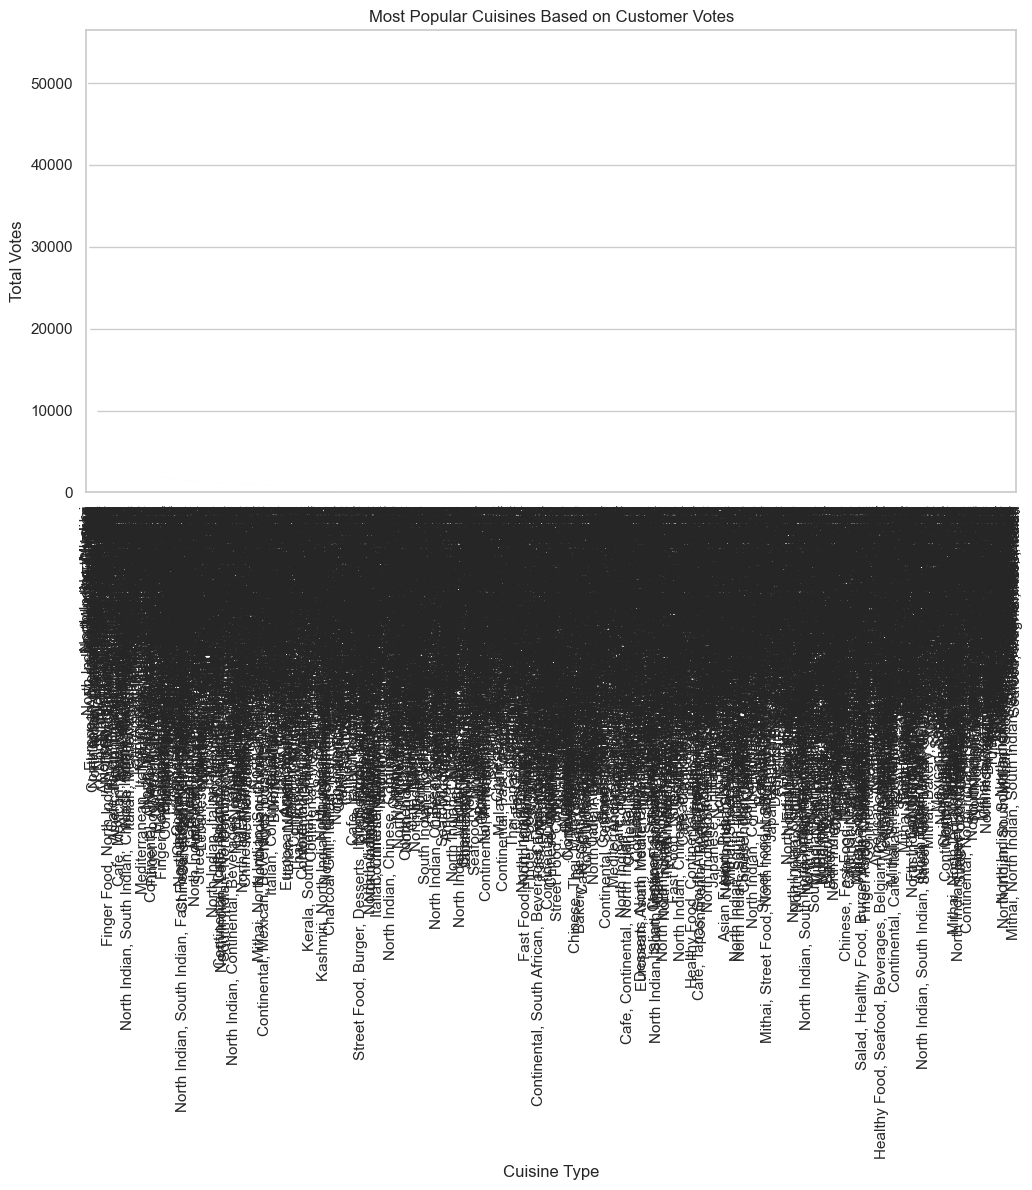

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_popularity.index, y=cuisine_popularity.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Cuisine Type")
plt.ylabel("Total Votes")
plt.title("Most Popular Cuisines Based on Customer Votes")
plt.show()

### Determine if Specific Cuisines Receive Higher Ratings

In [56]:
import scipy.stats as stats

correlation, p_value = stats.pearsonr(data["Aggregate rating"], data["Votes"])
print(f"Correlation between Rating and Votes: {correlation:.2f} (p-value: {p_value:.5f})")

Correlation between Rating and Votes: 0.31 (p-value: 0.00000)


### Data Visualization

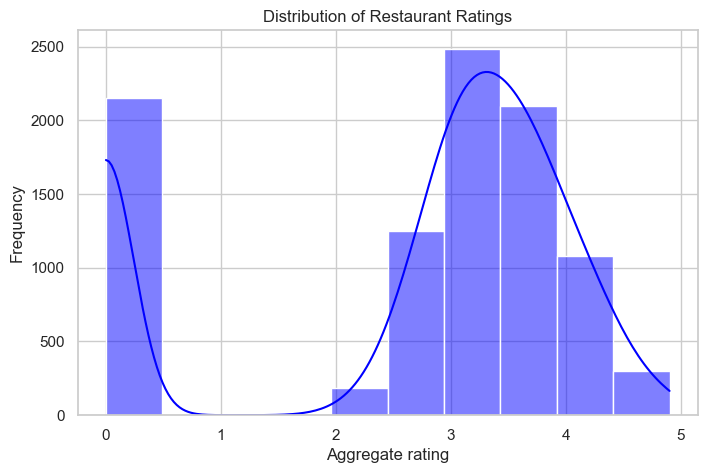

In [57]:
#Histogram (Rating Distribution)

plt.figure(figsize=(8, 5))
sns.histplot(df["Aggregate rating"], bins=10, kde=True, color="blue")
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.title("Distribution of Restaurant Ratings")
plt.show()

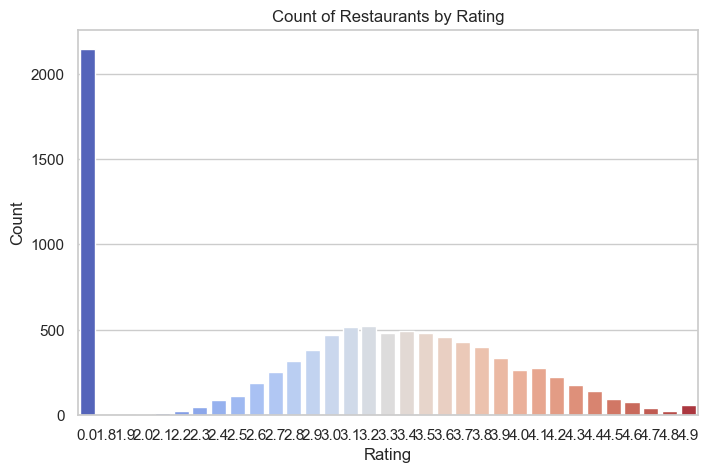

In [58]:
#Bar Plot (Rating Count)

plt.figure(figsize=(8, 5))
sns.countplot(x=df["Aggregate rating"], palette="coolwarm")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Count of Restaurants by Rating")
plt.show()

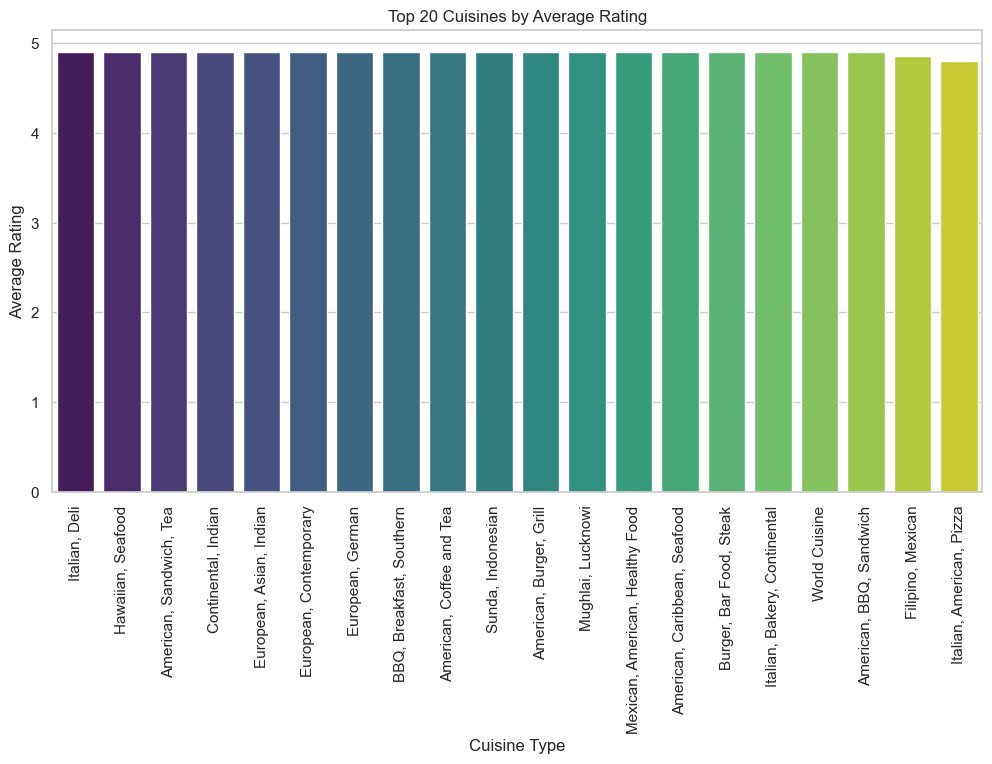

In [59]:
# Drop missing values in the Cuisines column
data.dropna(subset=["Cuisines"], inplace=True)

# Average Rating by Cuisine
cuisine_avg_rating = data.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)

# Visualize the Top 20 Cuisine Types by Rating
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_avg_rating.head(20).index, y=cuisine_avg_rating.head(20).values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Cuisine Type")
plt.ylabel("Average Rating")
plt.title("Top 20 Cuisines by Average Rating")
plt.show()

C:\Users\Geoffrey\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


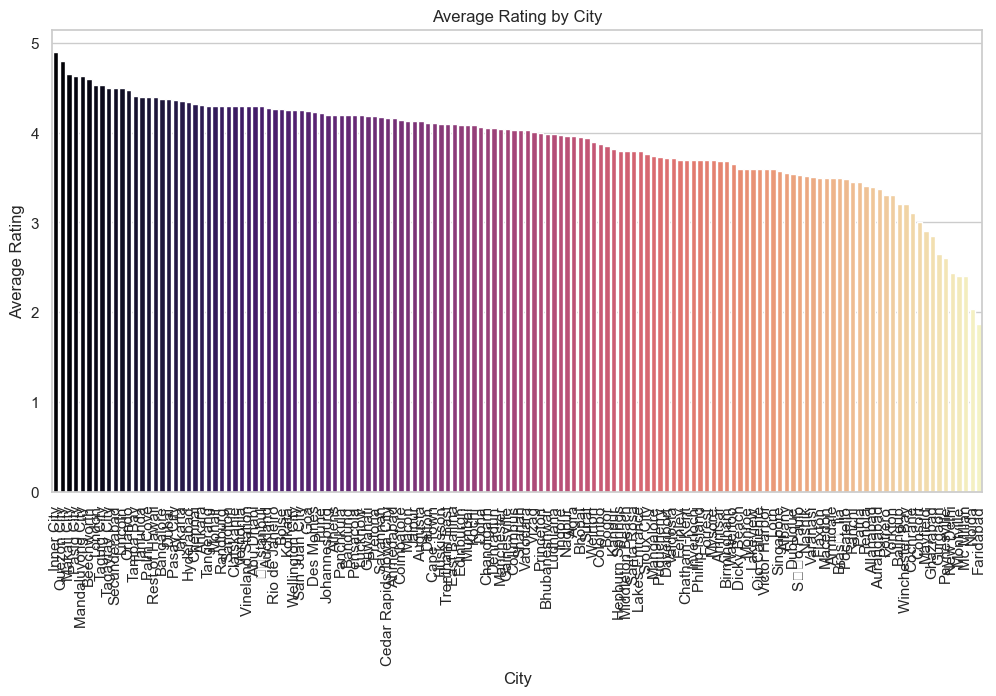

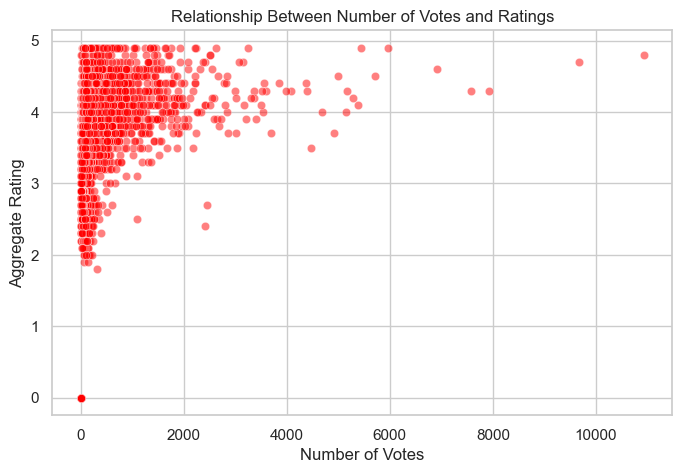

C:\Users\Geoffrey\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


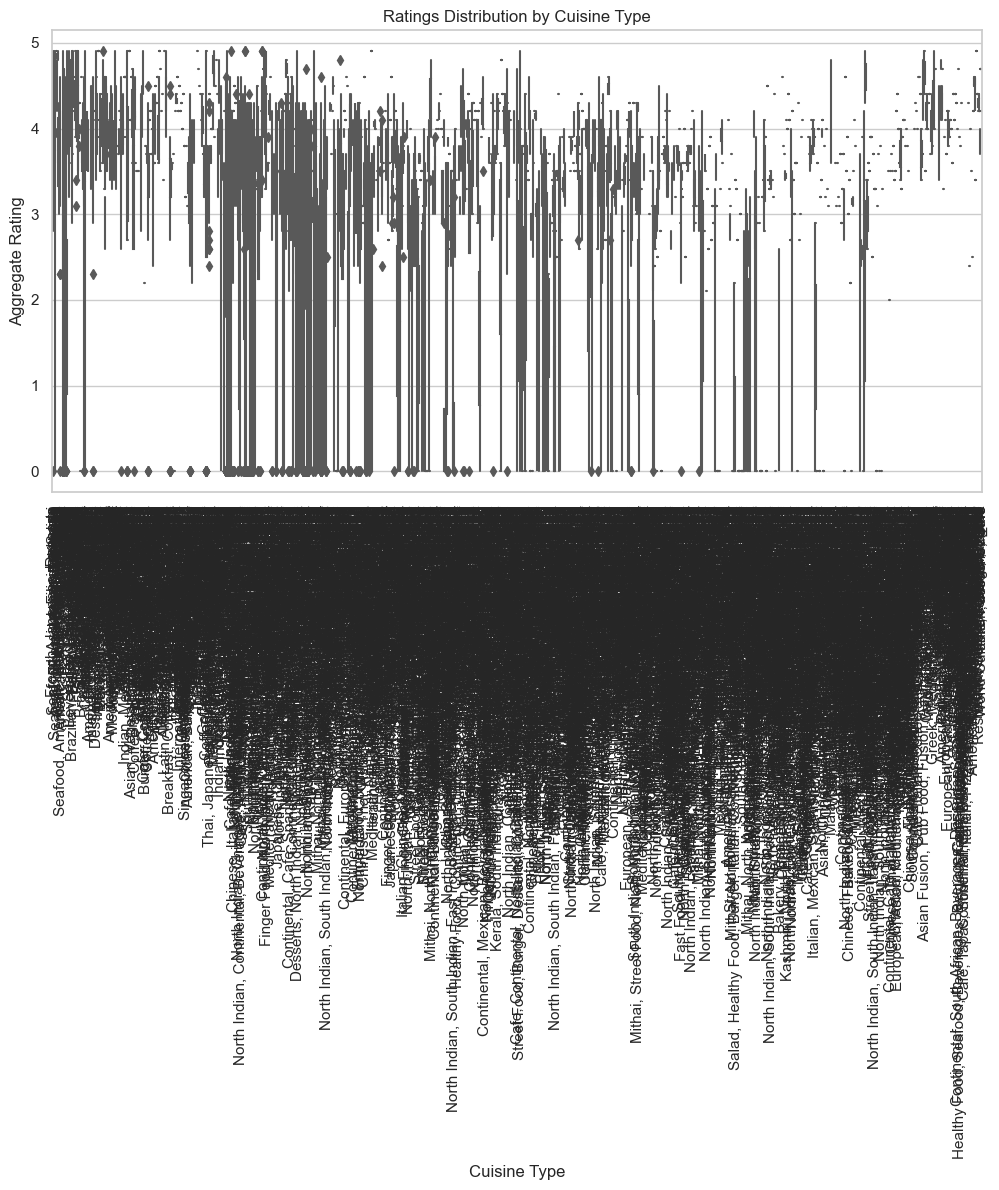

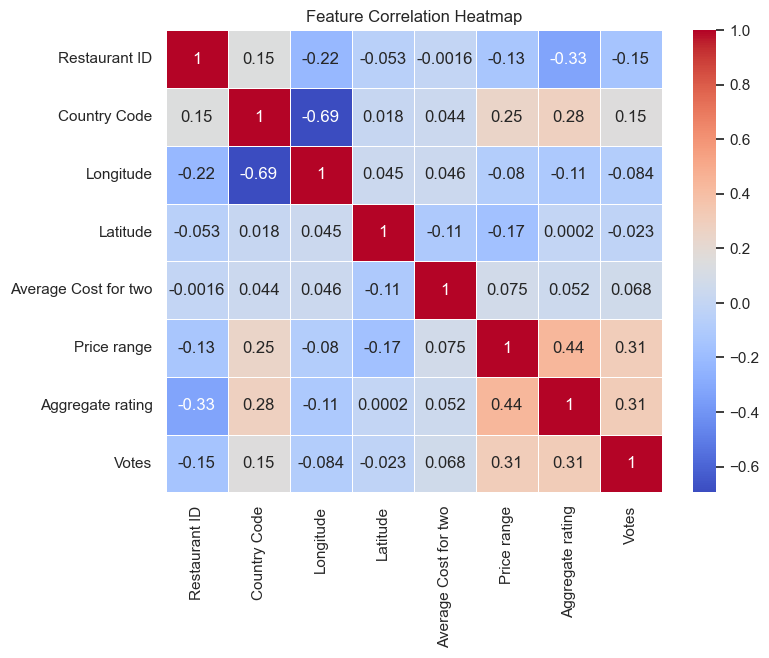

In [60]:
# Assuming df is already loaded
# Average Rating by City
df=data
city_avg_rating = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_avg_rating.index, y=city_avg_rating.values, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Average Rating by City")
plt.show()

# Scatter Plot: Ratings vs. Number of Votes
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Votes"], y=df["Aggregate rating"], alpha=0.5, color="red")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Relationship Between Number of Votes and Ratings")
plt.show()

# Box Plot: Ratings by Cuisine
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cuisines", y="Aggregate rating", data=df, palette="Set2")
plt.xticks(rotation=90)
plt.xlabel("Cuisine Type")
plt.ylabel("Aggregate Rating")
plt.title("Ratings Distribution by Cuisine Type")
plt.show()

# Heatmap: Correlation Between Features
import numpy as np

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\Geoffrey\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


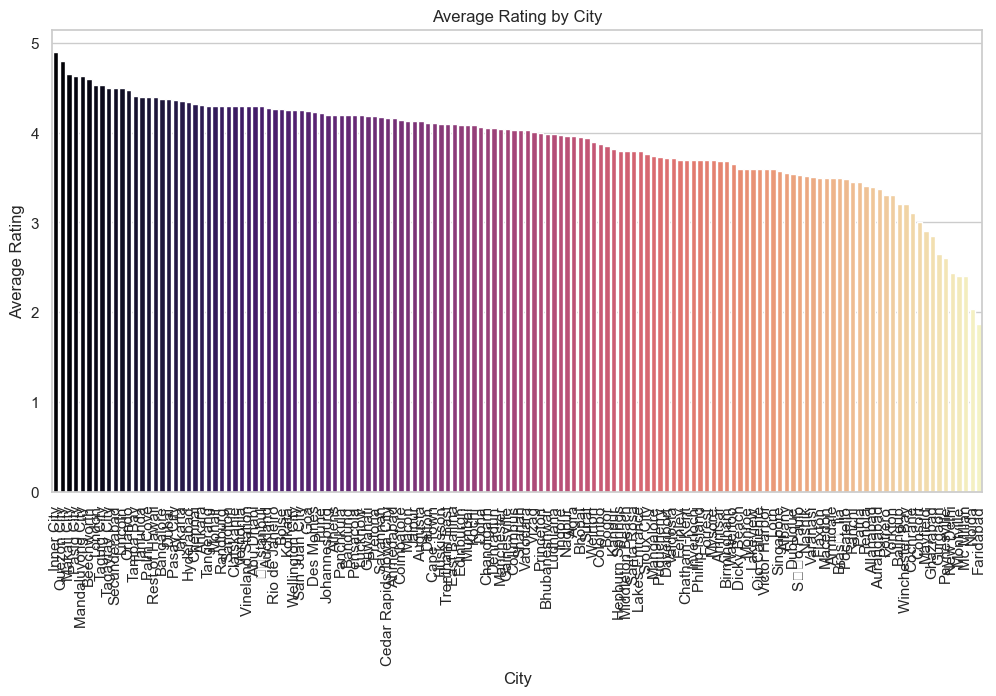

In [61]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


if "City" in df.columns and "Aggregate rating" in df.columns:
    city_avg_rating = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=city_avg_rating.index, y=city_avg_rating.values, palette="magma")
    plt.xticks(rotation=90)
    plt.xlabel("City")
    plt.ylabel("Average Rating")
    plt.title("Average Rating by City")
    plt.show()
else:
    print("Column names do not match. Available columns:", df.columns)